In [1]:
import re
import umap
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import glob
import numpy as np

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="2"

# Load a pre-trained sentence transformer model
model = SentenceTransformer("Alibaba-NLP/gte-large-en-v1.5", trust_remote_code=True)
# model = SentenceTransformer("all-mpnet-base-v2")

/ceph/iharsawi/miniconda3/envs/thesis7/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/ceph/iharsawi/miniconda3/envs/thesis7/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")


/ceph/iharsawi/miniconda3/envs/thesis7/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


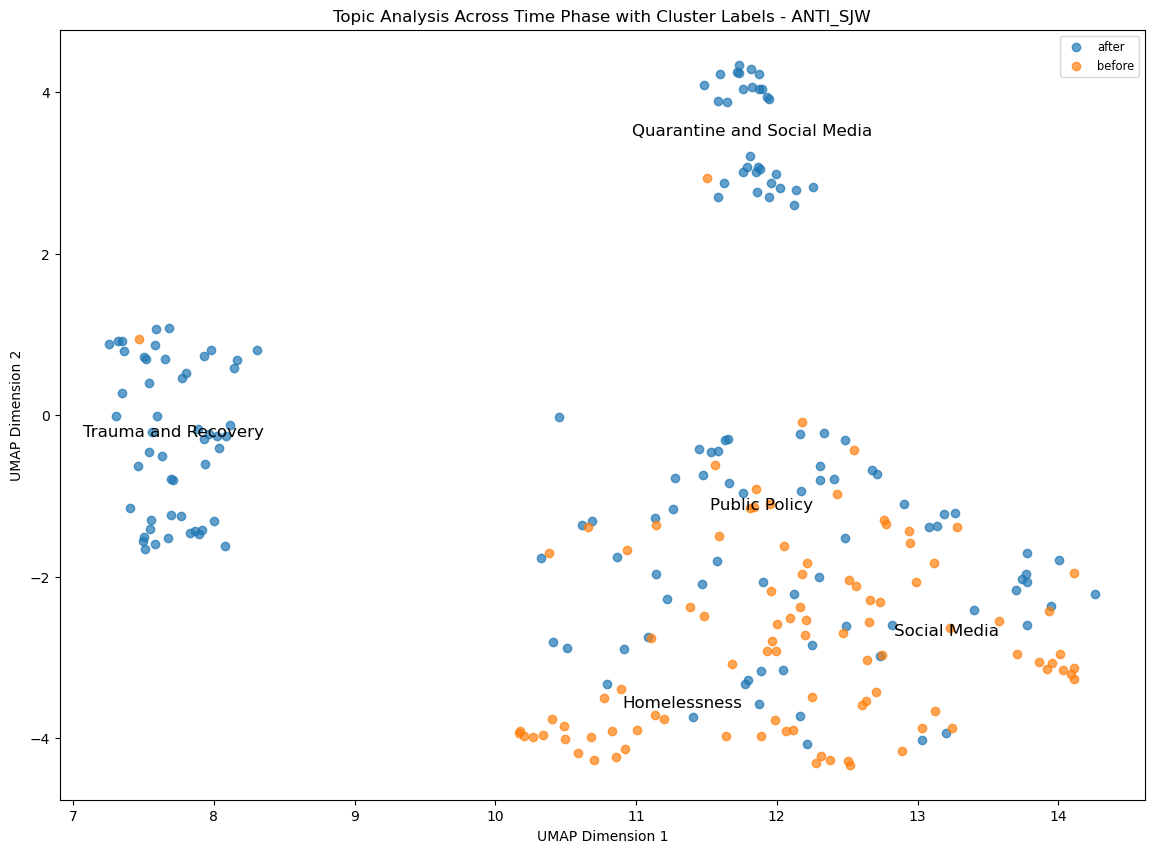

/ceph/iharsawi/miniconda3/envs/thesis7/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


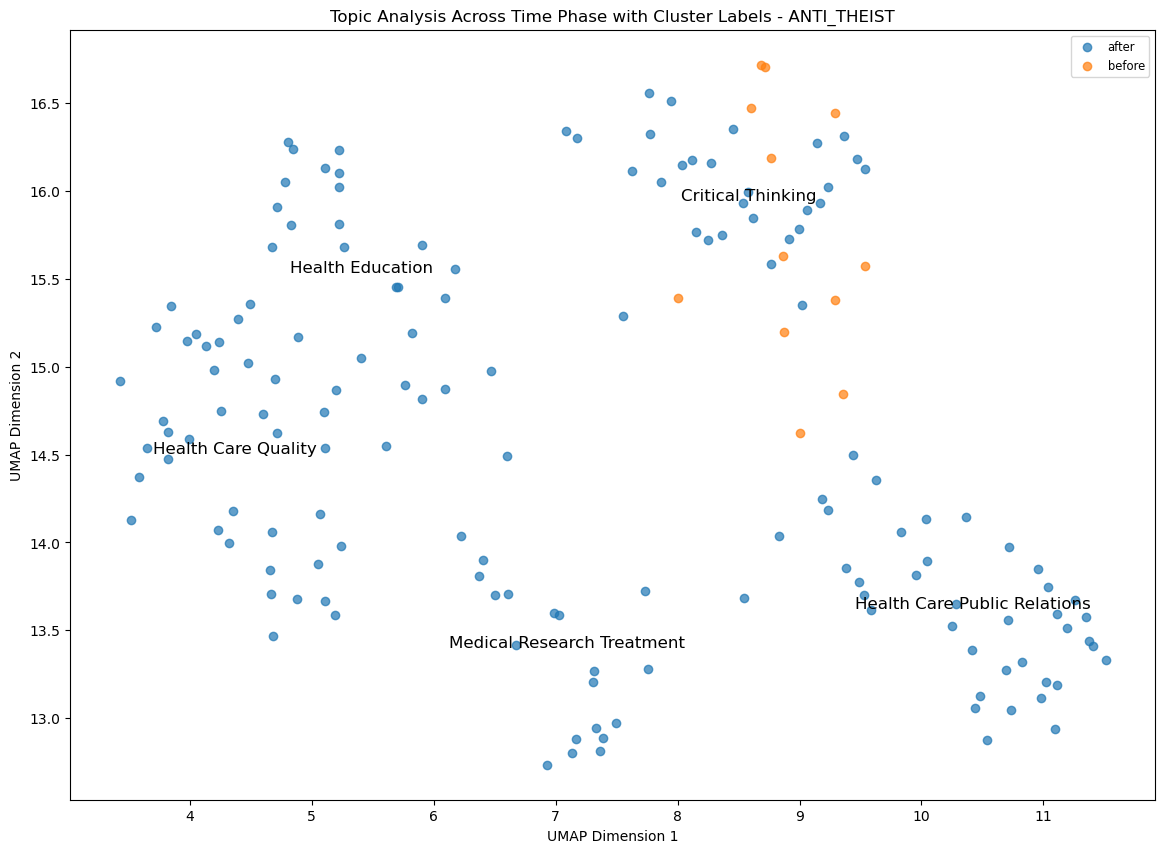

/ceph/iharsawi/miniconda3/envs/thesis7/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


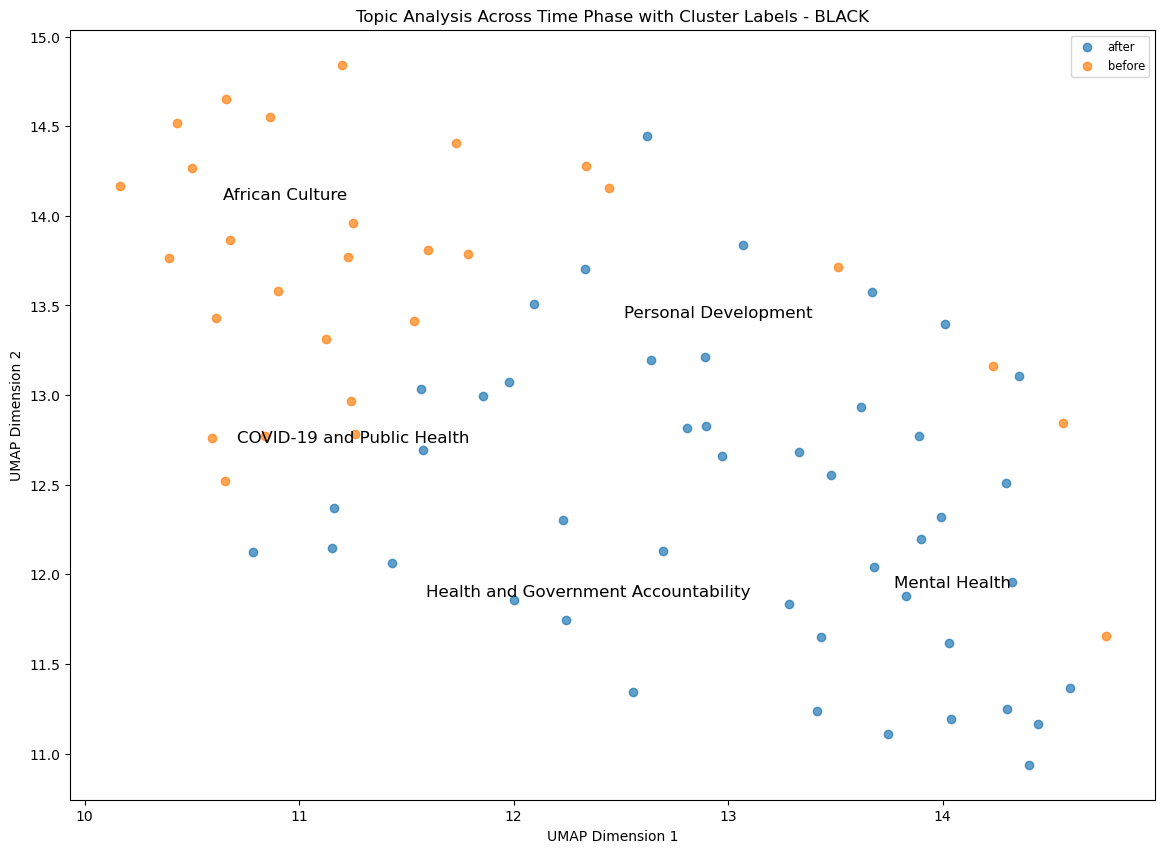

/ceph/iharsawi/miniconda3/envs/thesis7/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


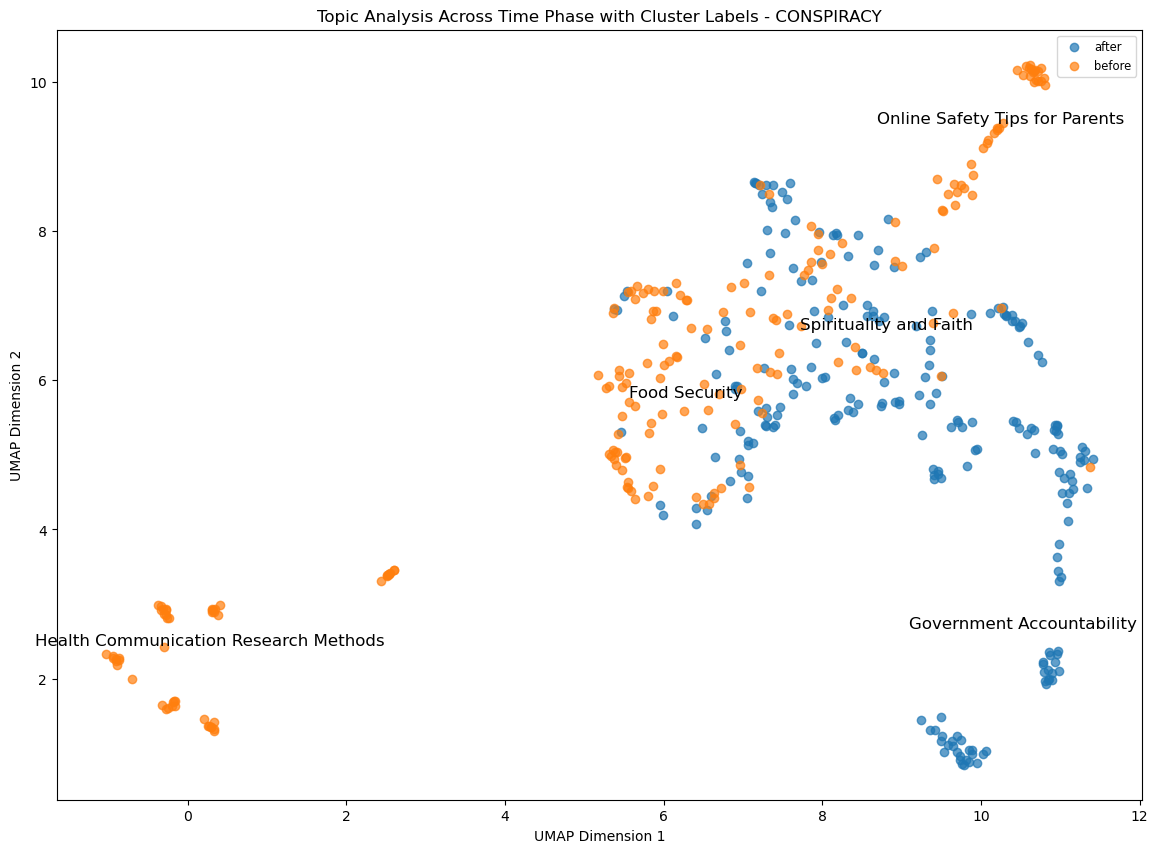

/ceph/iharsawi/miniconda3/envs/thesis7/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


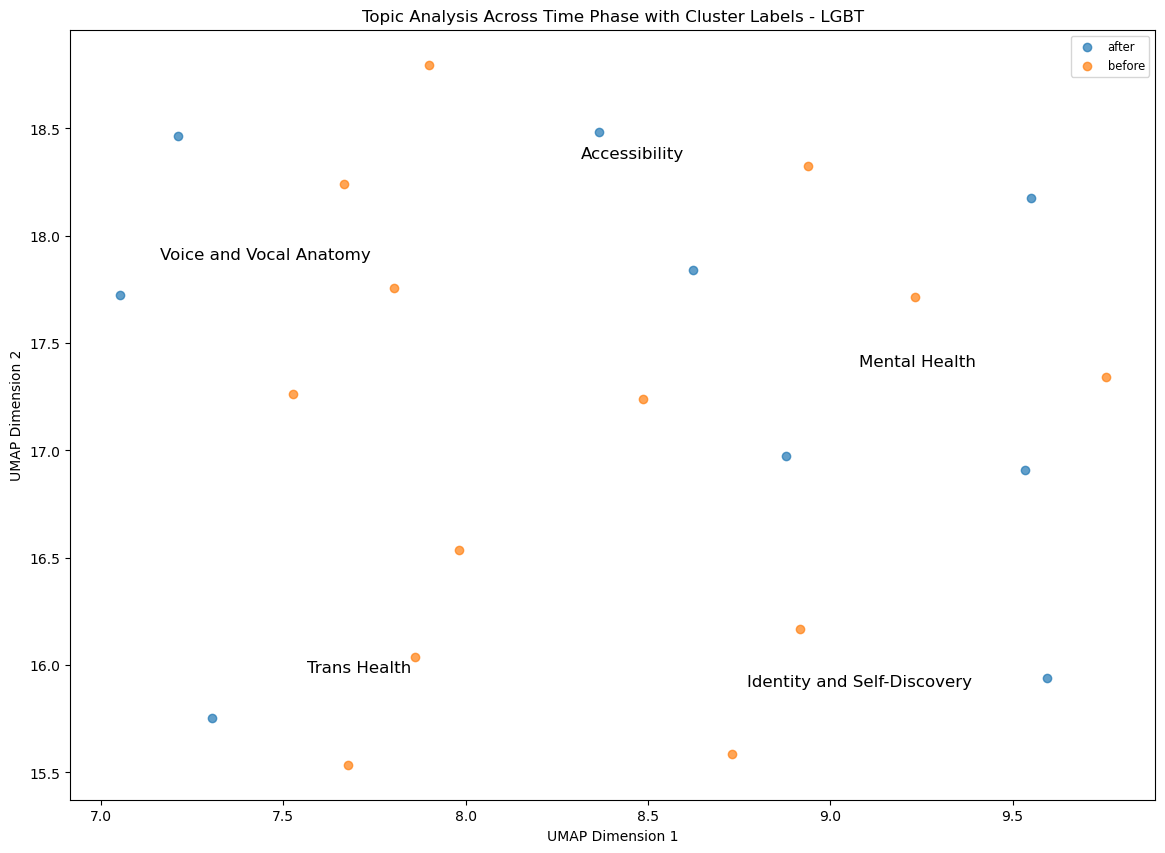

/ceph/iharsawi/miniconda3/envs/thesis7/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


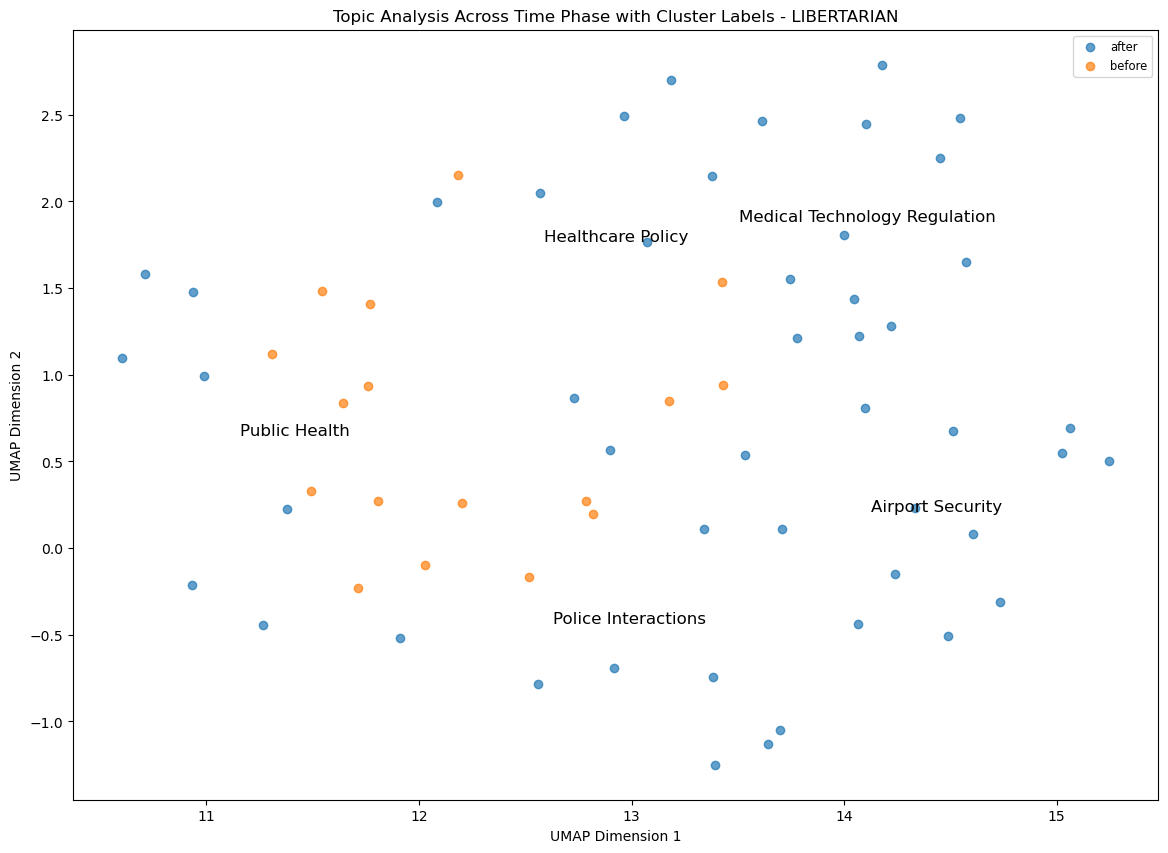

/ceph/iharsawi/miniconda3/envs/thesis7/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


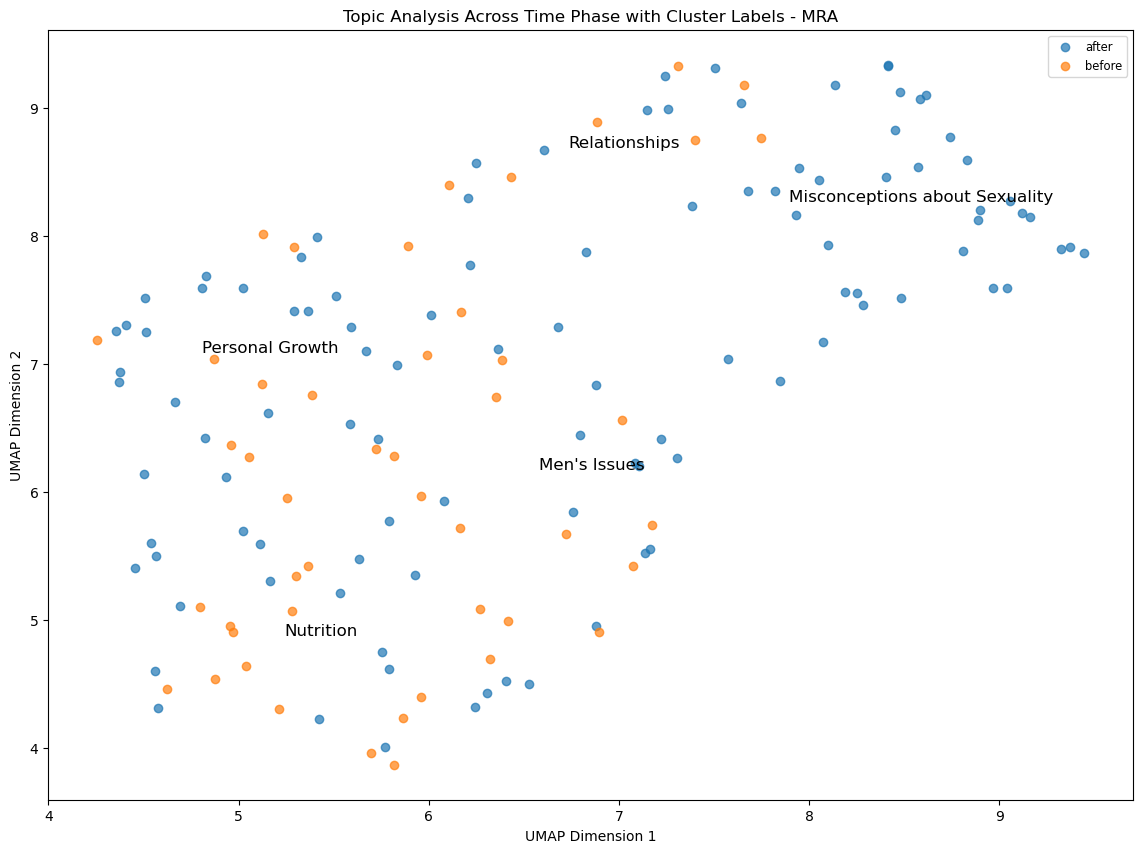

/ceph/iharsawi/miniconda3/envs/thesis7/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


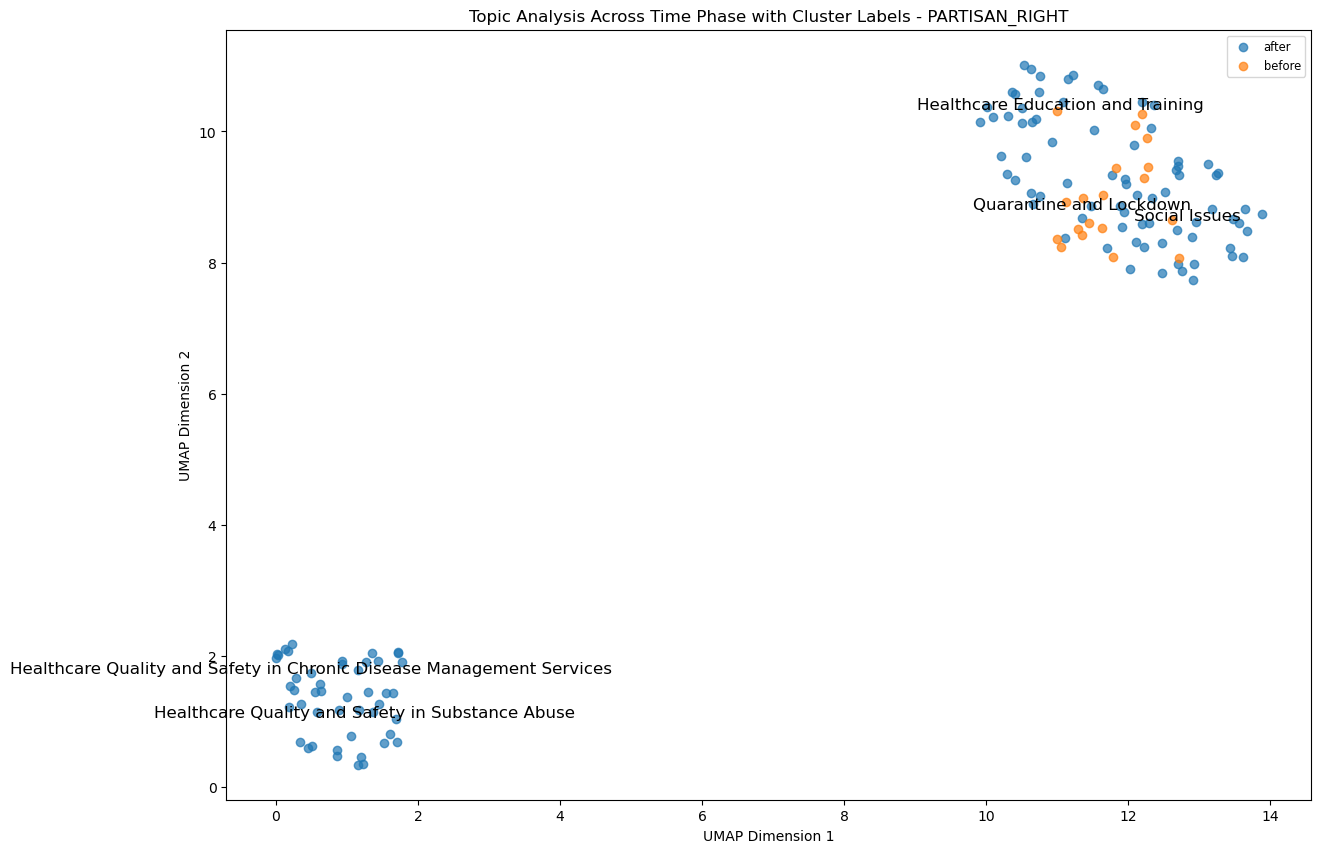

/ceph/iharsawi/miniconda3/envs/thesis7/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


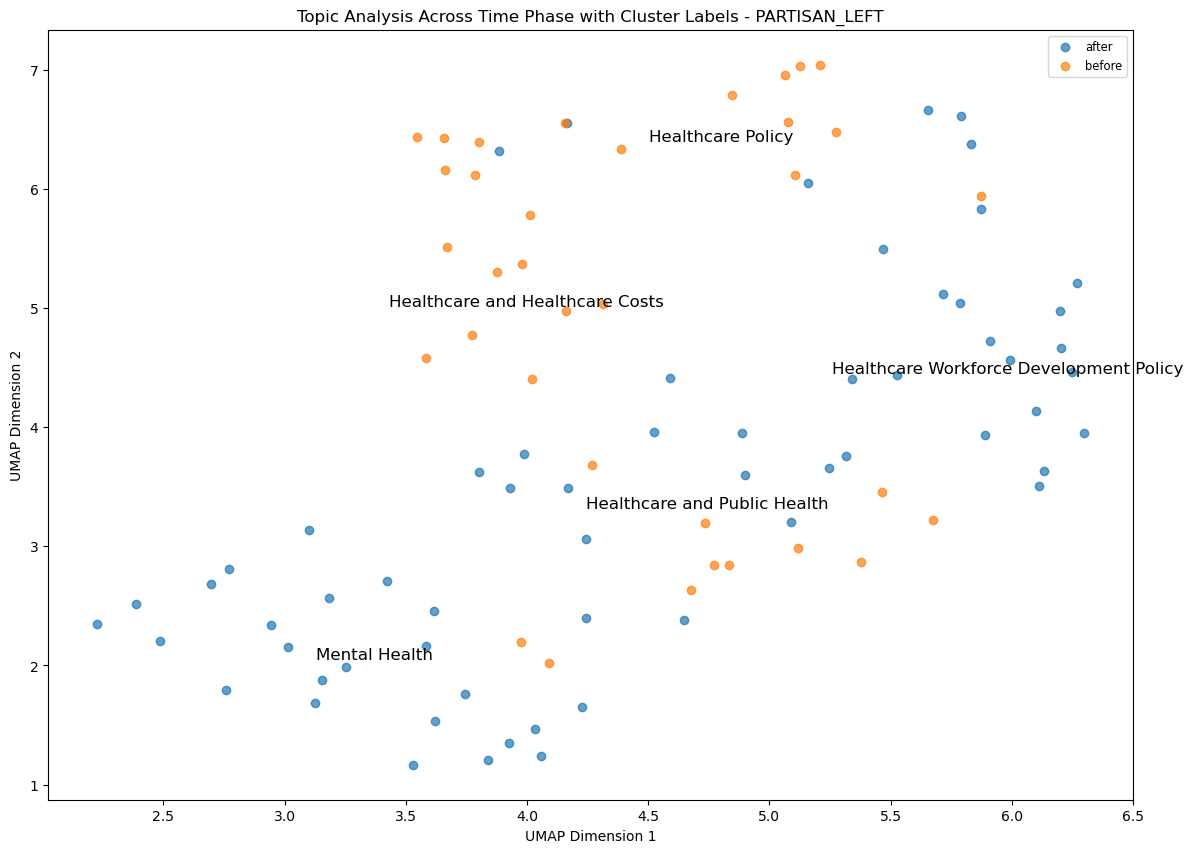

/ceph/iharsawi/miniconda3/envs/thesis7/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


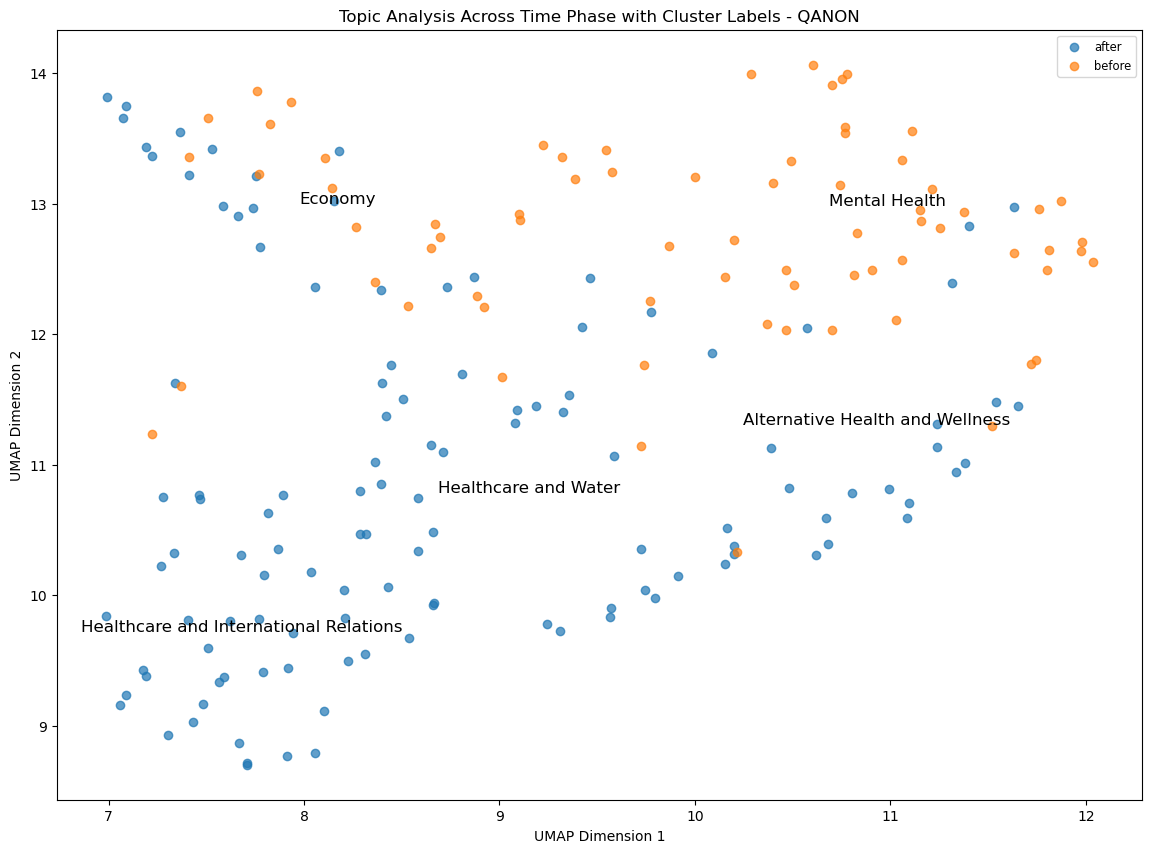

/ceph/iharsawi/miniconda3/envs/thesis7/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


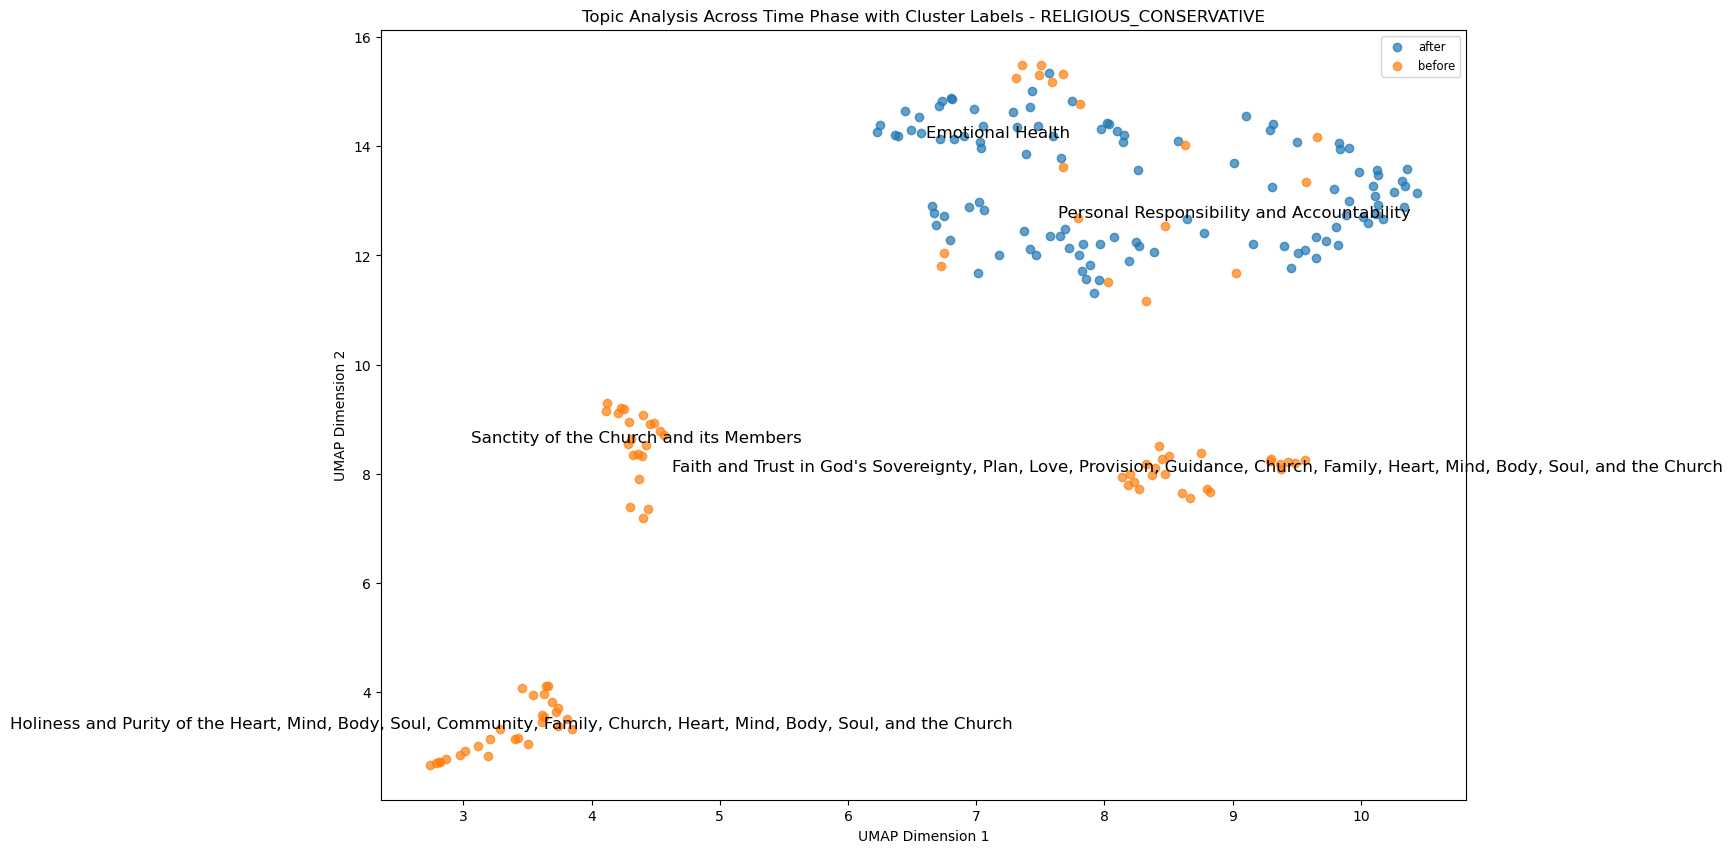

/ceph/iharsawi/miniconda3/envs/thesis7/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


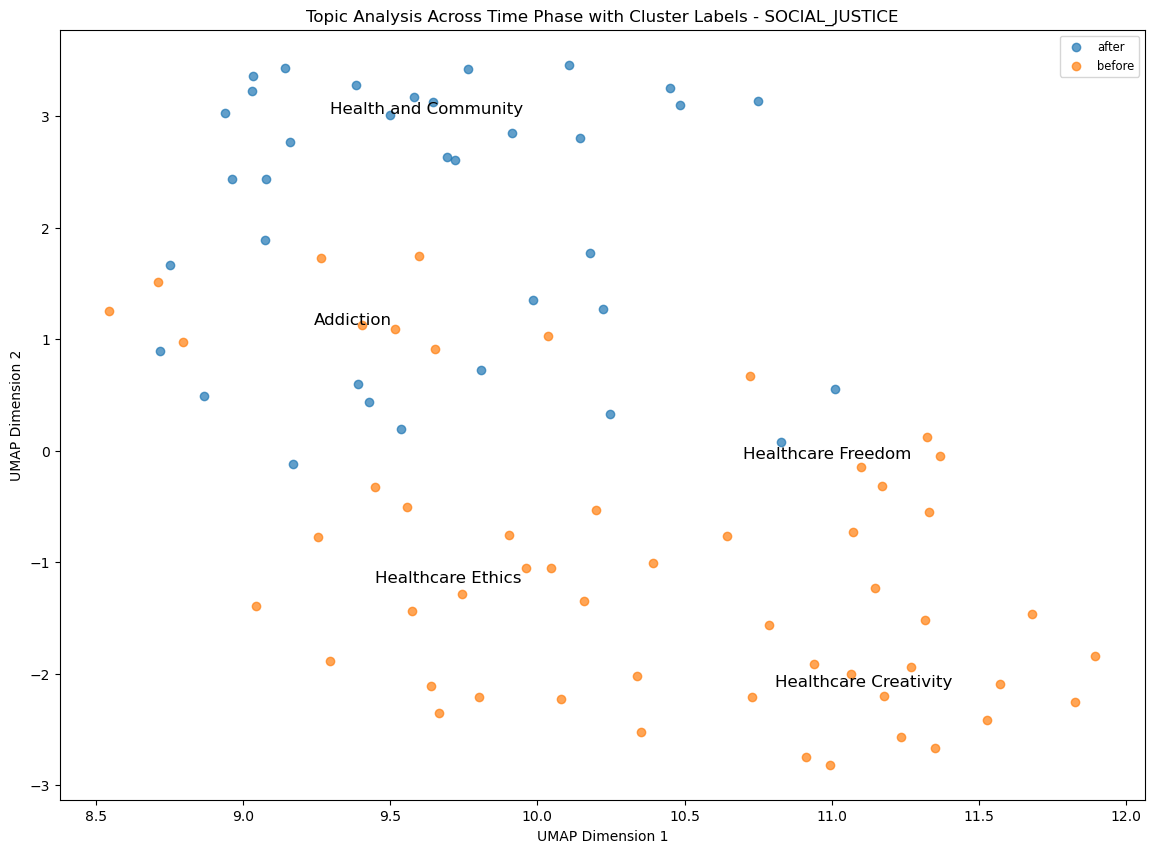

/ceph/iharsawi/miniconda3/envs/thesis7/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


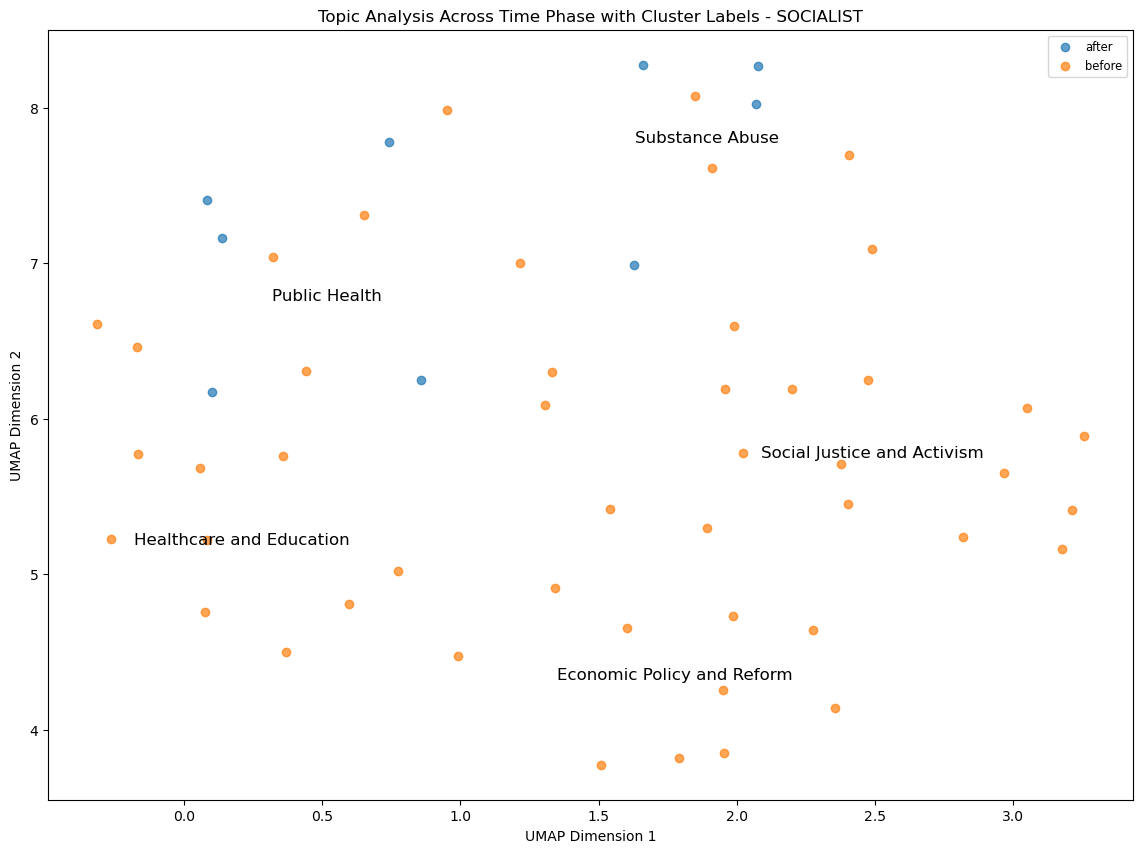

/ceph/iharsawi/miniconda3/envs/thesis7/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


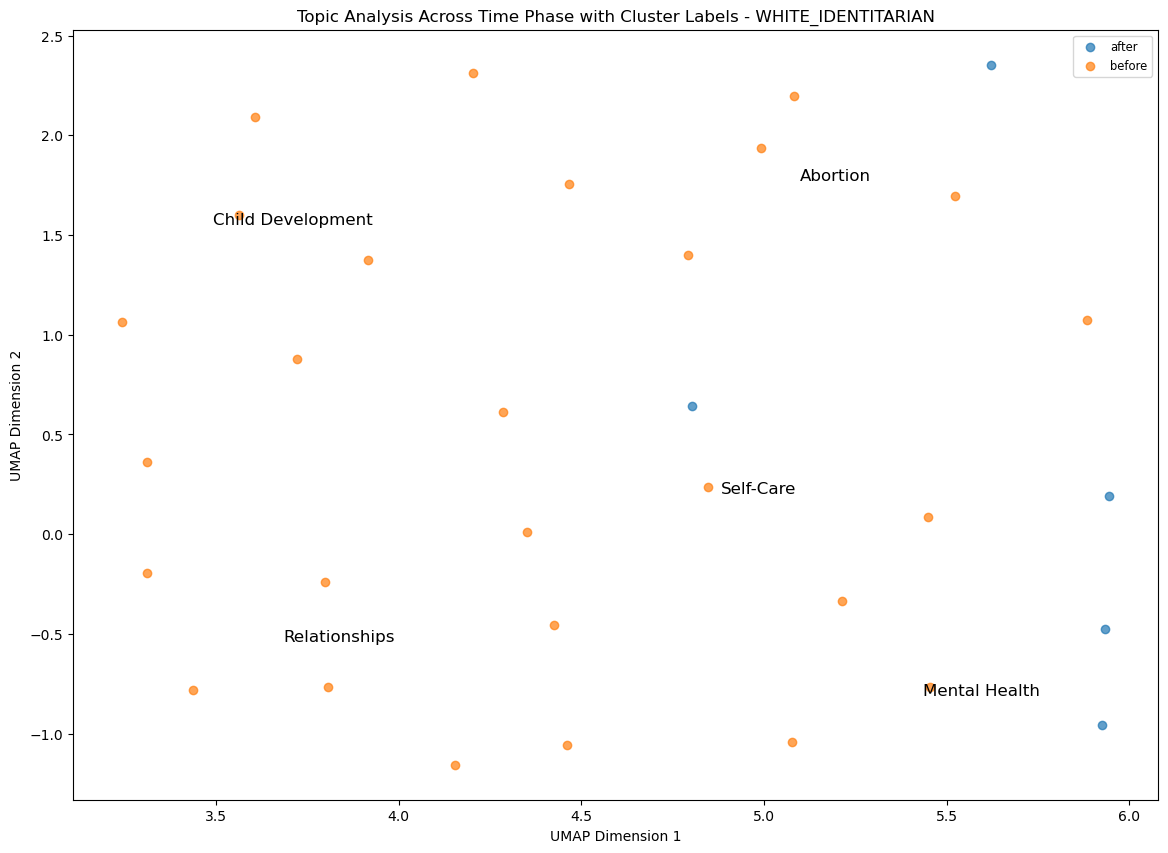

In [7]:
# Set the folder containing the files
folder_path = "../Llama3_1_Model_2/topicGPT/data/output/FINAL_SUMMARY"

# List of unique ideologies
ideologies = ["ANTI_SJW", "ANTI_THEIST", "BLACK", "CONSPIRACY", "LGBT", "LIBERTARIAN", 
              "MRA", "PARTISAN_RIGHT", "PARTISAN_LEFT", "QANON", "RELIGIOUS_CONSERVATIVE", 
              "SOCIAL_JUSTICE", "SOCIALIST", "WHITE_IDENTITARIAN"]
# ideologies = ["ANTI_SJW"]

def extract_subtopics(file_path, main_topic="Politics", subtopic_limit=None):
    try:
        with open(file_path, 'r') as file:
            data = file.read()

        # Regex to match the main topic and extract its description
        main_topic_pattern = re.compile(rf'\[1\] {main_topic} \(Count: \d+\): (.*?)\n')
        
        # Updated regex pattern to capture subtopic, count (optional), and description
        subtopic_pattern = re.compile(r'\[2\] ([^()]*?)(?: \(Count:\s*(\d+)\))?: (.*?)\n')

        # Find the section for the specified main topic
        main_topic_match = main_topic_pattern.search(data)
        if not main_topic_match:
            return f"Main topic '{main_topic}' not found."

        # Find the position of the main topic
        start_pos = main_topic_match.end()
        
        # Find the next main topic or the end of the string
        next_main_topic = re.search(r'\[1\]', data[start_pos:])
        end_pos = start_pos + (next_main_topic.start() if next_main_topic else len(data))

        # Extract the section related to the main topic
        section = data[start_pos:end_pos]

        # Extract all subtopics, their counts, and their descriptions
        subtopics = subtopic_pattern.findall(section)

        # Filter out subtopics with no count (count is None or empty)
        all_subtopics = [(subtopic.strip()) for subtopic, count, description in subtopics]
        subtopic_counts = [(int(count) if count and count.isdigit() else 0) for subtopic, count, description in subtopics]
                
        return list(zip(all_subtopics, subtopic_counts))

    except FileNotFoundError:
        print(f"File {file_path} not found.")
        return []

# Main topic to analyze (can be changed dynamically)
main_topic = "Health"

# Iterate over unique ideologies and time phases
for ideology in ideologies:
    # Initialize lists for storing topics, their counts, and their ideology
    time_phases = []
    all_topics = []
    topic_counts = []
    
    for time_phase in ["before", "after"]:  # Check both after and before files
        # Construct markdown filename
        md_filename = f"generation_2_{time_phase}_{ideology}_1TOPIC_ASS_{main_topic.lower()}.md"
        md_file_path = os.path.join(folder_path, md_filename)
        
        # Extract subtopics and their counts
        subtopics = extract_subtopics(md_file_path, main_topic)
        
        for subtopic, count in subtopics:
            time_phases.append(time_phase)
            all_topics.append(subtopic)
            topic_counts.append(count)

    consider_count = True  # Set to True to consider counts, or False to ignore them
    
    # Generate semantic embeddings for the topics (assuming 'model' is defined and ready)
    X = model.encode(all_topics)
    
    if consider_count:
        # Multiply embeddings by the square root of the counts to give weight to more frequent topics
        weighted_embeddings = np.array([embedding * np.sqrt(count) if count > 0 else embedding for embedding, count in zip(X, topic_counts)])
    else:
        # Use embeddings as-is, without considering topic counts
        weighted_embeddings = X
    
    # Perform UMAP dimensionality reduction
    reducer = umap.UMAP(n_components=2, random_state=42)
    embeddings = reducer.fit_transform(weighted_embeddings)
    
    # Cluster the topics using KMeans
    n_clusters = 5  # You can adjust the number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    
    # Get the cluster centers for labeling
    cluster_centers = kmeans.cluster_centers_
    
    # Plotting the result
    plt.figure(figsize=(14, 10))
    for time_phase in set(time_phases):
        indices = [i for i, tp in enumerate(time_phases) if tp == time_phase]
        plt.scatter(embeddings[indices, 0], embeddings[indices, 1], label=time_phase, alpha=0.7)
    
    # Label each cluster with the most common topic in the cluster
    for cluster_idx in range(n_clusters):
        # Get the indices of topics in this cluster
        cluster_topic_indices = np.where(labels == cluster_idx)[0]
        
        # Get the most common topic in the cluster
        cluster_topics = [all_topics[i] for i in cluster_topic_indices]
        most_common_topic = max(set(cluster_topics), key=cluster_topics.count)
        
        # Plot the label at the cluster center
        plt.text(cluster_centers[cluster_idx, 0], cluster_centers[cluster_idx, 1], 
                 most_common_topic, fontsize=12, ha='center', color='black')
    
    plt.title("Topic Analysis Across Time Phase with Cluster Labels - " + ideology)
    plt.legend(loc='best', fontsize='small')
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.show()